<a href="https://colab.research.google.com/github/s07376/Stock-Movement-Analysis-Based-on-Social-Media-Sentiment/blob/main/3_Stock_Movement_Analysis_Based_on_Social_Media_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install Required Libraries
!pip install praw pandas nltk vaderSentiment

# Step 2: Import Libraries
import praw
import pandas as pd
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

# Step 3: Scrape Data from Reddit
nltk.download('punkt')

# Initialize Reddit API client
reddit = praw.Reddit(
    client_id='W7PO0eoQkm48gLiTKac1GA',
    client_secret='aO7r9l6DsNW9nl0J2HL_lDb78xktWA',
    user_agent='Potential-Average609'
)

# Scrape data from a specific subreddit
subreddit = reddit.subreddit('wallstreetbets')
posts = []

for submission in subreddit.new(limit=100):  # Change limit as needed
    posts.append([submission.title, submission.selftext, submission.created])

# Create DataFrame
df = pd.DataFrame(posts, columns=['title', 'body', 'created'])

# Step 4: Clean and Preprocess the Data
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

df['cleaned_body'] = df['body'].apply(clean_text)

# Display the cleaned DataFrame
print(df.head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                               title  \
0        What effect will this have on TSLA, if any?   
1  Recommend some strategies that can be implemen...   
2            Nuclear stocks - what’s your favorite?    
3  Googles grip on search slips to TikTok and AI ...   
4     The housing market will soon start correcting.   

                                                body       created  \
0  It's no surprise that Elon has begun to lean t...  1.728225e+09   
1  Genuine question - What are the strategies or ...  1.728222e+09   
2  It seems like the US is starting to wake up to...  1.728220e+09   
3  I genuinely think AI is the future of search i...  1.728215e+09   
4  Obviously this is not financial advice. This i...  1.728193e+09   

                                        cleaned_body  
0  It's no surprise that Elon has begun to lean t...  
1  Genuine question - What are the strategies or ...  
2  It seems like the US is starting to wake up to...  
3  I genuinely think A

In [2]:
# Step 1: Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Step 2: Perform Sentiment Analysis
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Return compound score

df['sentiment'] = df['cleaned_body'].apply(get_sentiment)

# Step 3: Extract Key Features
df['created'] = pd.to_datetime(df['created'], unit='s')  # Convert timestamp
df['date'] = df['created'].dt.date
daily_sentiment = df.groupby('date').agg({'sentiment': 'mean', 'title': 'count'}).reset_index()
daily_sentiment.columns = ['date', 'avg_sentiment', 'mention_count']

# Display daily sentiment DataFrame
print(daily_sentiment.head())


         date  avg_sentiment  mention_count
0  2024-10-04       0.148355             49
1  2024-10-05       0.279676             41
2  2024-10-06       0.358900             10


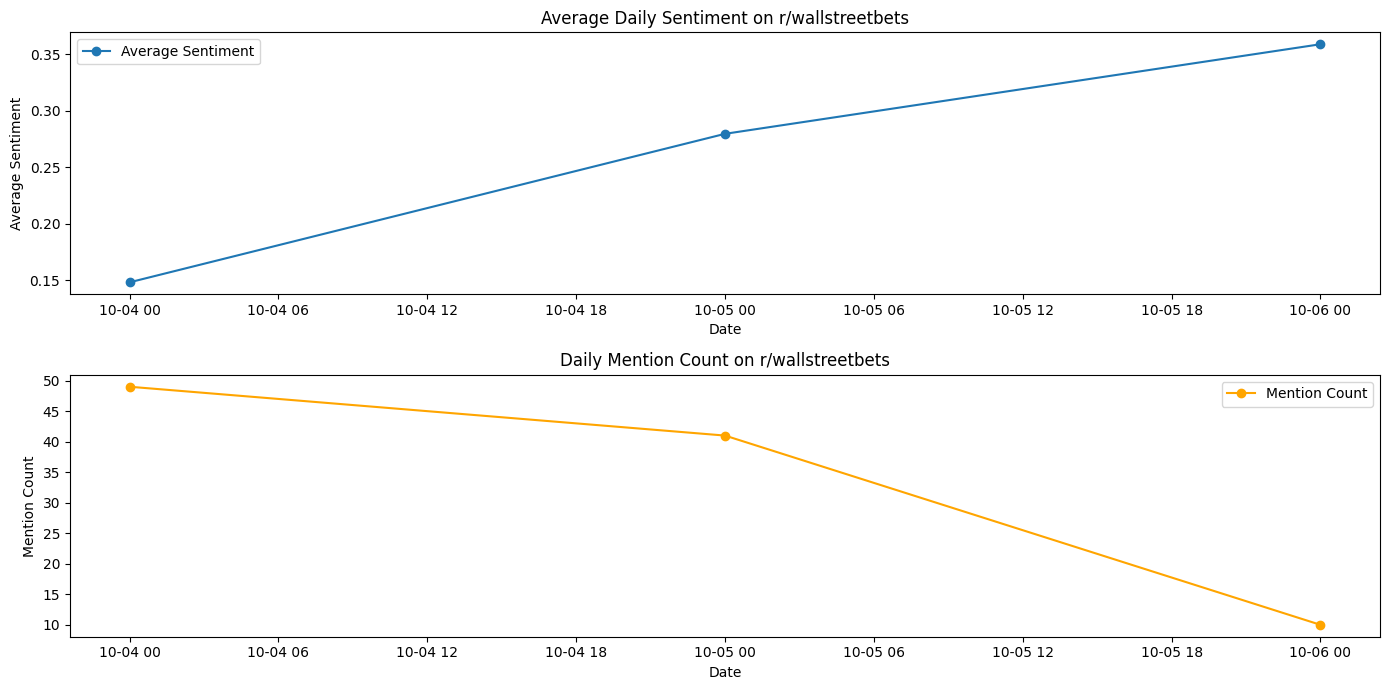

Correlation between average sentiment and mention count: -0.8915352903444529


In [3]:
import matplotlib.pyplot as plt

# Step 1: Create Visualizations
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(daily_sentiment['date'], daily_sentiment['avg_sentiment'], marker='o', label='Average Sentiment')
plt.title('Average Daily Sentiment on r/wallstreetbets')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(daily_sentiment['date'], daily_sentiment['mention_count'], marker='o', color='orange', label='Mention Count')
plt.title('Daily Mention Count on r/wallstreetbets')
plt.xlabel('Date')
plt.ylabel('Mention Count')
plt.legend()

plt.tight_layout()
plt.show()

# Step 2: Report Findings
correlation = daily_sentiment['avg_sentiment'].corr(daily_sentiment['mention_count'])
print(f'Correlation between average sentiment and mention count: {correlation}')


In [4]:
# Example Recommendations
if correlation > 0.5:
    print("Positive correlation detected: Consider monitoring sentiment trends closely.")
else:
    print("No significant correlation detected: Sentiment may not directly influence price movements.")


No significant correlation detected: Sentiment may not directly influence price movements.
